In [102]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.cross_validation import train_test_split
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
test = pd.read_csv("/Users/thomascurran/desktop/MACS30200proj2/Data/ms_test_normalize.csv").drop("Unnamed: 0", axis = 1)

In [89]:
test['Year'] = test['Year'].astype('category')

In [90]:
test2 = test.select_dtypes(include = ['int', 'float'])

In [91]:
y = test2['IndexScore']
x = test2.iloc[:,1:len(test2)]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = .76, random_state = 25)

In [92]:
xtrain = xtrain.values
xtest = xtest.values
ytrain = ytrain.values
ytest = ytest.values

In [93]:
def kfold_cv(func, k = 4, epochs = 10, batch = 1):
    all_mae_histories = []
    all_mse_histories = []
    num_val_samples = len(xtrain)//k
    
    
    for i in range(0,k):
        print('processing fold #', i)
        
        val_data = xtrain[i * num_val_samples: (i + 1) * num_val_samples]    
        
        val_targets = ytrain[i * num_val_samples: (i + 1) * num_val_samples]
        
        partial_train_data = np.concatenate(                                     
            [xtrain[:i * num_val_samples],
             xtrain[(i + 1) * num_val_samples:]],
            axis=0)
        
        partial_train_targets = np.concatenate(
            [ytrain[:i * num_val_samples],
             ytrain[(i + 1) * num_val_samples:]],
            axis=0)

        model = func()                                                    
       
        history = model.fit(partial_train_data, 
                            partial_train_targets,           
                            validation_data=(val_data, val_targets),
                            epochs=epochs, 
                            batch_size=batch, 
                            verbose=0)
        
        mae_history = history.history['val_mean_absolute_error']
        all_mae_histories.append(mae_history)
       
        mse_history = history.history['val_loss']
        all_mse_histories.append(mse_history)
        
    return(all_mae_histories, 
               all_mse_histories, 
               xtrain,
               ytrain,
               model, 
               history)

In [103]:
#Produces the MAE plot for each model
def mae_plot(mses, epochs):
    avg_mae = [np.mean([x[i] for x in mses]) for i in range(epochs)]
    plt.figure(figsize = (10,10))
    plt.plot(range(1, len(avg_mae) + 1), avg_mae)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MSE')
    plt.show()

In [104]:

#prints the MSE and MAE for each Model#prints t 
def model_metrics(test_data, test_targets, model):
    mse, mae = model.evaluate(test_data, test_targets)
    print("MSE For Test Set: ", mse)
    print("MAE For Test Set: ", mae)

In [105]:
#function that passes in the data to all the other functions
def q3(model, k=10, epochs = 10, batch = 1):
    mae_scores, mse_scores, test_data, test_targets, model_train, model_history = kfold_cv(model, k, epochs, batch)
    mae_plot(mse_scores, epochs)
    model_metrics(test_data, test_targets, model_train)
    return(mae_scores, mse_scores)

In [125]:
from keras import regularizers

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


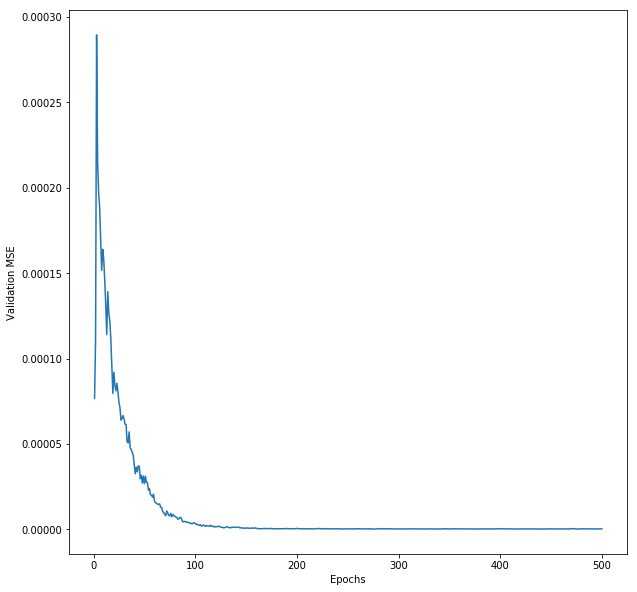

675/675 [==============================] - 0s 53us/step
MSE For Test Set:  2.31158258901e-07
MAE For Test Set:  0.000452252701615


In [106]:
K = 10
epochs = 500
batch = 50

def baseline():
    model = models.Sequential()
    
    model.add(layers.Dense(64, 
                           activation='relu',
                           input_shape=(xtrain.shape[1],)))
    
    model.add(layers.Dense(64, 
                           activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', 
                  loss='mse', 
                  metrics=['mae'])
    return model

baseline_mae, baseline_mses = q3(baseline, K, epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


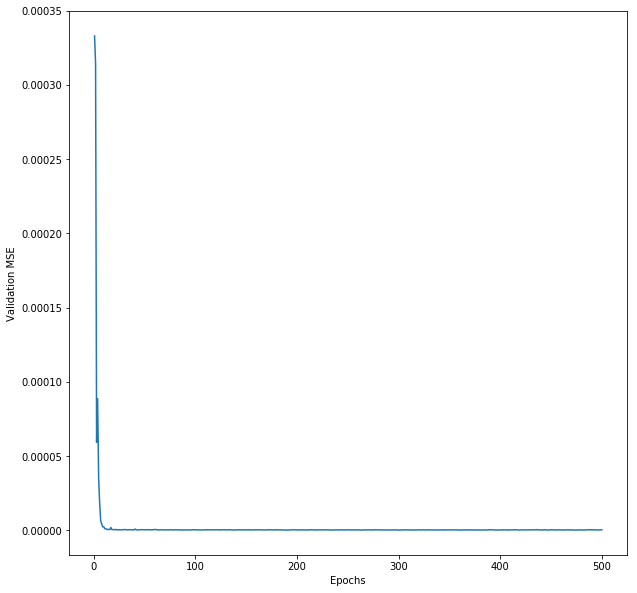

675/675 [==============================] - 0s 57us/step
MSE For Test Set:  3.25181979153e-07
MAE For Test Set:  0.00053790807724


In [117]:
#Model 2
'''
Changing:

First layer input to 100
K = 10 (as instructed)

changing model to dropout layer

changing batch size to 50

'''
K = 10
epochs = 500
batch = 50
def model2():
    model = models.Sequential()
    
    model.add(layers.Dense(100, activation='relu',
                           input_shape=(xtrain.shape[1],)))
    model.add(layers.Dropout(.5))
    
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(.5))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

model2_mae, model2_mses = q3(baseline, K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


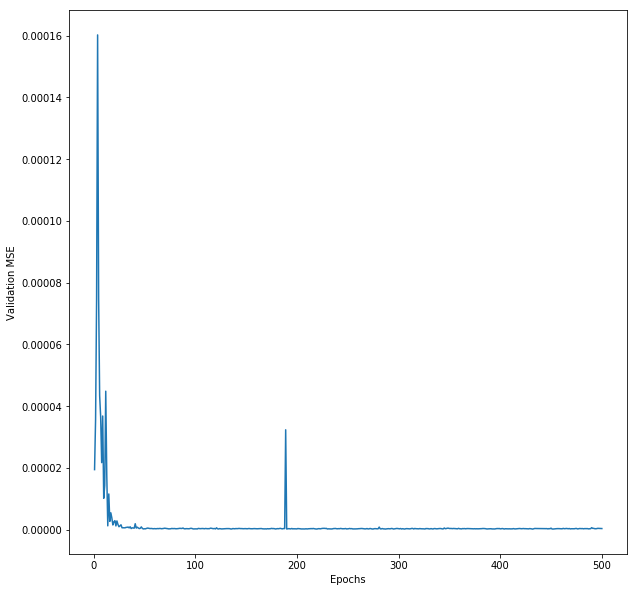

675/675 [==============================] - 0s 98us/step
MSE For Test Set:  3.28389753324e-07
MAE For Test Set:  0.00055206444136


In [118]:
#Model 3
'''
Changing:

adding more layers w/o dropout, keeping k, epochs and batch the same

K = 10
epochs = 200
batch = 150

'''
K = 10
epochs = 500
batch = 50

def model4():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu',
                           input_shape=(xtrain.shape[1],)))
    model.add(layers.Dense(150, activation='relu'))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model3_mae, model3_mses = q3(model4,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


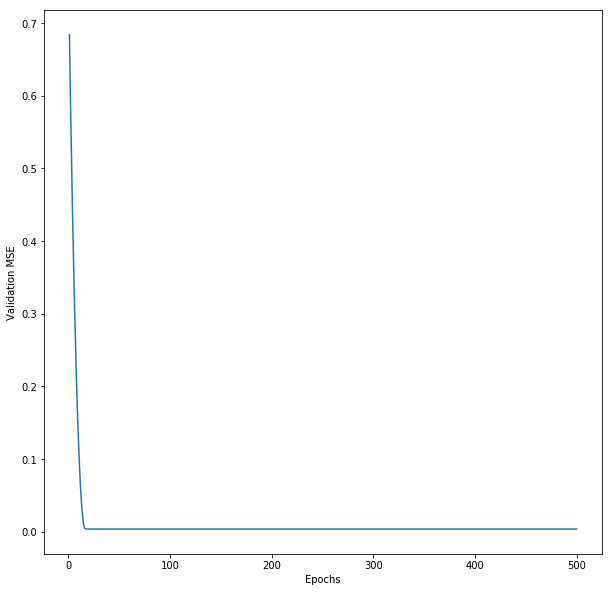

675/675 [==============================] - 0s 116us/step
MSE For Test Set:  0.0036697365861
MAE For Test Set:  0.000471041667603


In [126]:
#Model 5
'''
Changing:

returning to base model but changing to l1 penalization
K = 10
epochs = 200
batch = 150

kernel_regularizer = regularizers.l1(0.001)
'''
K = 10
epochs = 500
batch = 50

def model5():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model5_mae, model5_mses = q3(model6,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


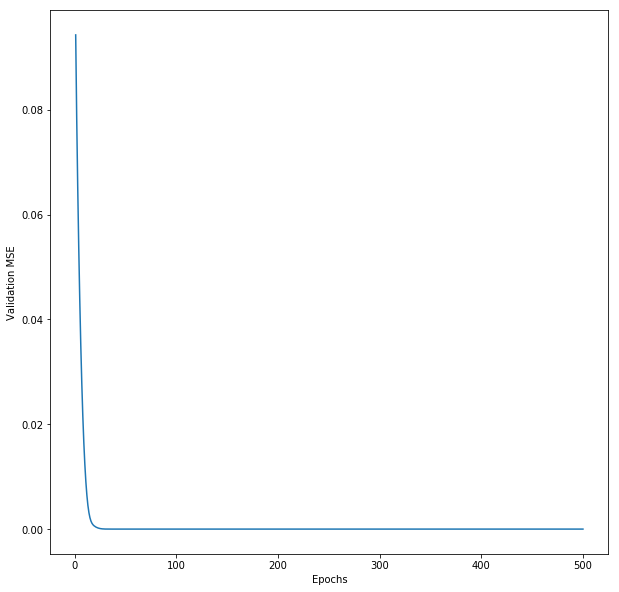

675/675 [==============================] - 0s 145us/step
MSE For Test Set:  1.94423562014e-06
MAE For Test Set:  0.00062107368243


In [127]:
'''
Changing:

returning to base model but changing to l2 penalization

kernel_regularizer = regularizers.l2(0.001)
'''
K = 10
epochs = 500
batch = 50

def model6():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model6_mae, model6_mses = q3(model6,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


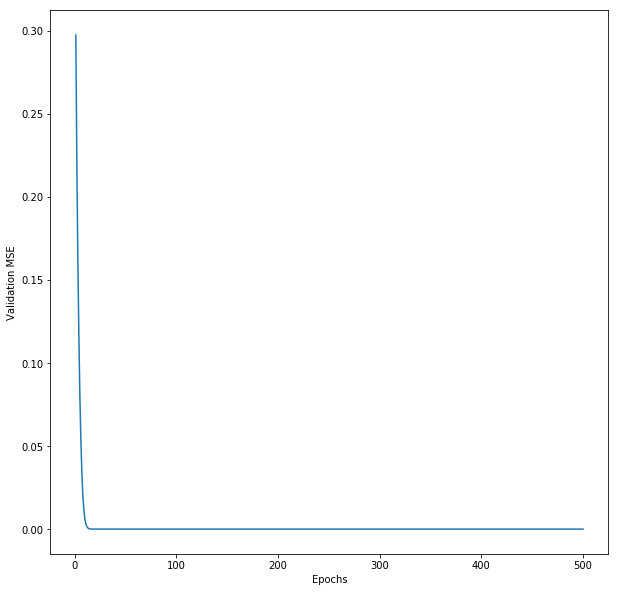

675/675 [==============================] - 0s 141us/step
MSE For Test Set:  1.26367181952e-05
MAE For Test Set:  0.000568808293125


In [128]:
'''
Changing:

since model 3 had some good performance, I am going to add a l2 penalization
since model 5 worked well


'''
K = 10
epochs = 500
batch = 50

def model7():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu', input_shape=(xtrain.shape[1],),kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(150, activation='relu',kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(100, activation='relu',kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(50, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model7_mae, model7_mses = q3(model7,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


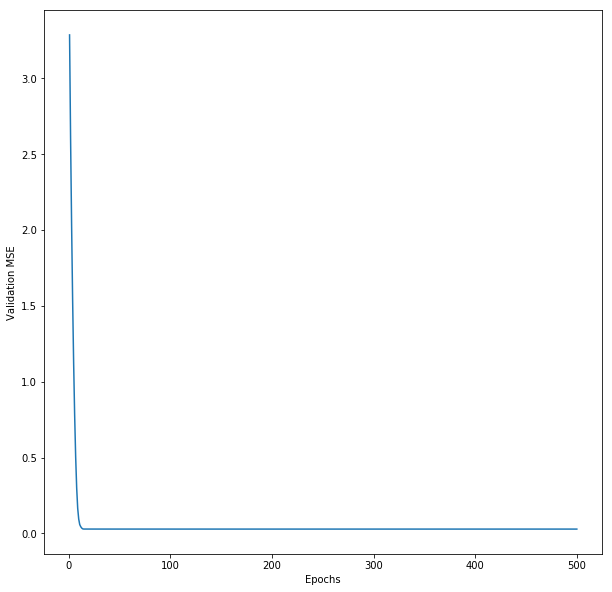

675/675 [==============================] - 0s 159us/step
MSE For Test Set:  0.0289516095541
MAE For Test Set:  0.000541459669411


In [133]:
'''
Changing:

Seeing if anything changes with l1 penalization


'''
K = 10
epochs = 500
batch = 50

def model8():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu', input_shape=(xtrain.shape[1],),kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(150, activation='relu',kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(100, activation='relu',kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(50, activation='relu', kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model8_mae, model8_mses = q3(model8,K,epochs, batch)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


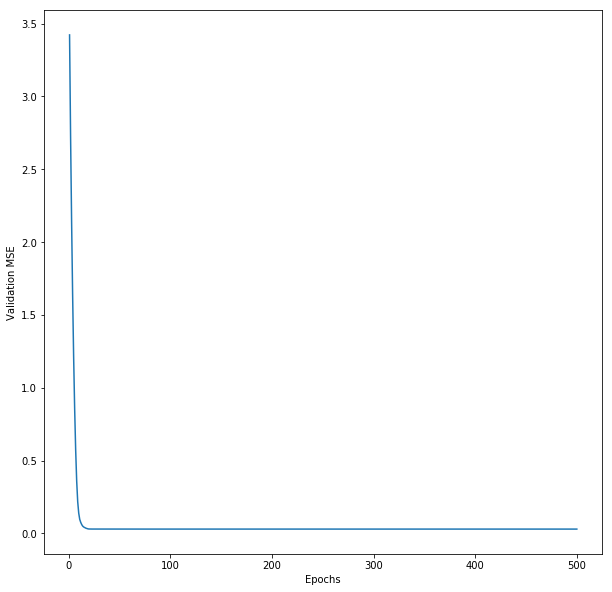

675/675 [==============================] - 0s 170us/step
MSE For Test Set:  0.0293127968411
MAE For Test Set:  0.0005174706759


In [134]:
#Model 8
'''
Changing:

returning to base model but changing to l1 penalization
K = 10
epochs = 200
batch = 150

kernel_regularizer = regularizers.l1(0.001)
'''
K = 10
epochs = 500
batch = 50

def model9():
    model = models.Sequential()
    model.add(layers.Dense(200, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(150, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(100, activation='relu',
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(50, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(25, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model9_mae, model9_mses = q3(model9,K,epochs, batch)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


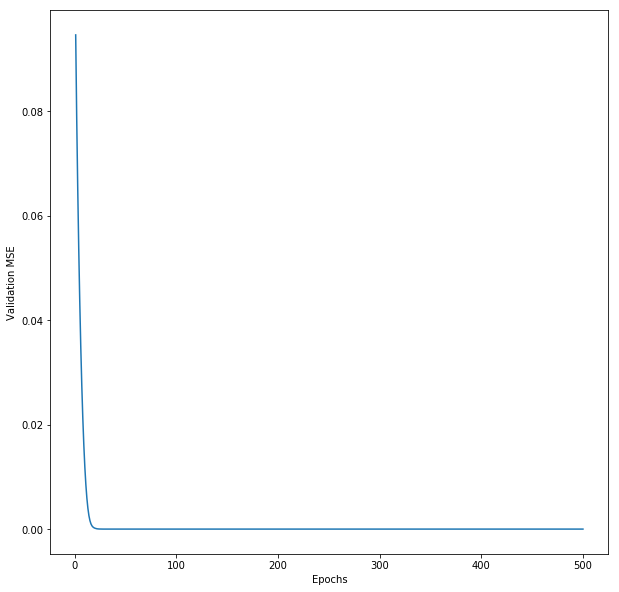

675/675 [==============================] - 0s 178us/step
MSE For Test Set:  1.75089368861e-06
MAE For Test Set:  0.000444690091234
214/214 [==============================] - 3s 14ms/step
[1.9285373412534785e-06, 0.00061284683733987052]


In [153]:
'''
Changing:

returning to base model but changing to l2 penalization

kernel_regularizer = regularizers.l2(0.001)

K = 10
epochs = 500
batch = 50

def model6():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(100, activation='relu',
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model6_mae, model6_mses = q3(model6,K,epochs, batch)
'''
def model_final():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(xtrain.shape[1],),
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#model6_mae, model6_mses = q3(model6,K,epochs, batch)

model = model_final()

model_final = model.fit(xtrain, ytrain, epochs = 100, batch_size = 10, verbose = 0)

model_final_eval = model.evaluate(xtest, ytest)

print(model_final_eval)

In [156]:
model.predict(xtest)

array([[ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.0014801],
       [ 0.00

In [152]:
ytest

array([ 0.00089901,  0.00116905,  0.0008771 ,  0.0006346 ,  0.00099118,
        0.0009272 ,  0.00096388,  0.00090815,  0.00096423,  0.00103776,
        0.00073784,  0.00091177,  0.00067244,  0.00052166,  0.00092382,
        0.00103774,  0.00041016,  0.00051665,  0.00088241,  0.00068094,
        0.00094862,  0.00086495,  0.00088143,  0.00071256,  0.00100824,
        0.00085704,  0.00108047,  0.00083527,  0.00090066,  0.00089929,
        0.00092051,  0.0008417 ,  0.00105593,  0.00101639,  0.0007449 ,
        0.00119853,  0.00094446,  0.00100115,  0.00035602,  0.0010089 ,
        0.00109293,  0.00097588,  0.00068148,  0.00094068,  0.00052874,
        0.00103433,  0.00084929,  0.00082058,  0.00074711,  0.00087199,
        0.00096587,  0.00084639,  0.00085723,  0.00114408,  0.00097104,
        0.0005325 ,  0.00103437,  0.00096892,  0.00094821,  0.00070638,
        0.00089456,  0.00101082,  0.00095092,  0.00113325,  0.00096061,
        0.00063419,  0.00092407,  0.00106536,  0.00066681,  0.00